## Data Loading

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read CSV 
df = pd.read_csv("Dataset.csv")

# Drop the "reference" column if it exists
if "Reference" in df.columns:
    df = df.drop(columns=["Reference"])

# Display the dataframe
print(df.head())


  Dopant    EN    IR  State  NED    FIE  Ratio      MMM   LV   HV  Current  \
0     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.1   
1     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.2   
2     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.5   
3     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      1.0   
4     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      2.0   

    DC  
0  231  
1  329  
2  297  
3  251  
4  174  


# Class Distribution

In [17]:
import numpy as np

data = df['DC']


# Calculate Q1 and Q3
Q1 = np.percentile(data, 33.33)
Q3 = np.percentile(data, 66.67)

# Calculate IQR
IQR = Q3 - Q1

# Calculate mean
mean = np.mean(data)

# Calculate median
median = np.median(data)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Mean:", mean)
print("Median:", median)
print("Min: ", np.min(data))
print("Max: ", np.max(data))

Q1: 166.64669999999998
Q3: 248.0
IQR: 81.35330000000002
Mean: 210.11833333333334
Median: 205.5
Min:  50
Max:  449


In [18]:
import pandas as pd


# Function to classify values
def classify_value(value):
    if value < 166.65:
        return 0
    elif 166.65 <= value < 248:
        return 1
    else:
        return 2

# Apply the function to the 'Values' column and create a new 'Classification' column
df['Classification'] = df['DC'].apply(classify_value)

# Drop the "dc" column if it exists
if "DC" in df.columns:
    df = df.drop(columns=["DC"])
print(df.head())

  Dopant    EN    IR  State  NED    FIE  Ratio      MMM   LV   HV  Current  \
0     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.1   
1     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.2   
2     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      0.5   
3     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      1.0   
4     Mo  2.16  70.0      4   42  684.3  0.114  97.8783  1.0  1.8      2.0   

   Classification  
0               1  
1               2  
2               2  
3               2  
4               1  


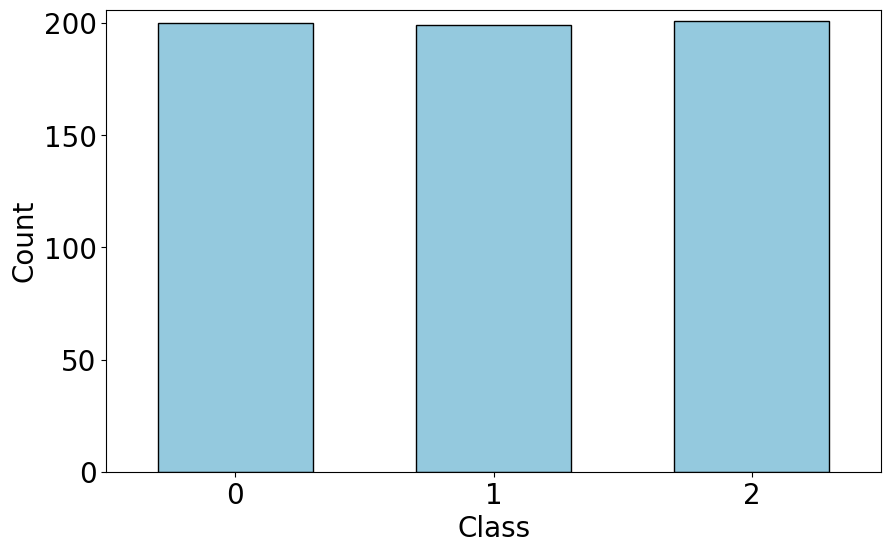

In [19]:
plt.rcParams.update({'font.size': 20})

# Create histogram with manual bar width and spacing adjustments
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df["Classification"].value_counts().sort_index().index,  # Class labels
    y=df["Classification"].value_counts().sort_index().values,  # Counts
    color="skyblue",  # Aesthetic color palette
    width=0.6,  # Adjust width for spacing
    edgecolor="black"
)

# Beautify the graph
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=range(len(df["Classification"].unique())), labels=[0, 1, 2])  # Use class labels [0, 1, 2]
plt.ylim(0, max(df["Classification"].value_counts()) + 5)  # Add a buffer to the Y-axis for clarity
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines to the background

# Save and show the plot
plt.savefig("Class_distribution.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

# Classification

## K-Nearest Neighbors

[I 2025-06-13 00:37:45,659] A new study created in memory with name: no-name-88ee83a1-bd40-40eb-b862-ca0de4f1d4c0
[I 2025-06-13 00:37:45,746] Trial 0 finished with value: 0.654555940023068 and parameters: {'n_neighbors': 31}. Best is trial 0 with value: 0.654555940023068.
[I 2025-06-13 00:37:45,822] Trial 1 finished with value: 0.634083044982699 and parameters: {'n_neighbors': 38}. Best is trial 0 with value: 0.654555940023068.
[I 2025-06-13 00:37:45,878] Trial 2 finished with value: 0.6658016147635525 and parameters: {'n_neighbors': 22}. Best is trial 2 with value: 0.6658016147635525.
[I 2025-06-13 00:37:45,936] Trial 3 finished with value: 0.654555940023068 and parameters: {'n_neighbors': 30}. Best is trial 2 with value: 0.6658016147635525.
[I 2025-06-13 00:37:45,991] Trial 4 finished with value: 0.6658016147635525 and parameters: {'n_neighbors': 22}. Best is trial 2 with value: 0.6658016147635525.
[I 2025-06-13 00:37:46,046] Trial 5 finished with value: 0.643598615916955 and paramet

Best params: {'n_neighbors': 4}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.60      0.50      0.55        30
           2       0.68      0.77      0.72        30

    accuracy                           0.69        90
   macro avg       0.68      0.69      0.68        90
weighted avg       0.68      0.69      0.68        90

Confusion Matrix:
[[24  6  0]
 [ 4 15 11]
 [ 3  4 23]]
Precision: 0.6835547122074637
Recall: 0.6888888888888889
Specificity: 0.6888888888888889
AUC-ROC: 0.8271296296296297


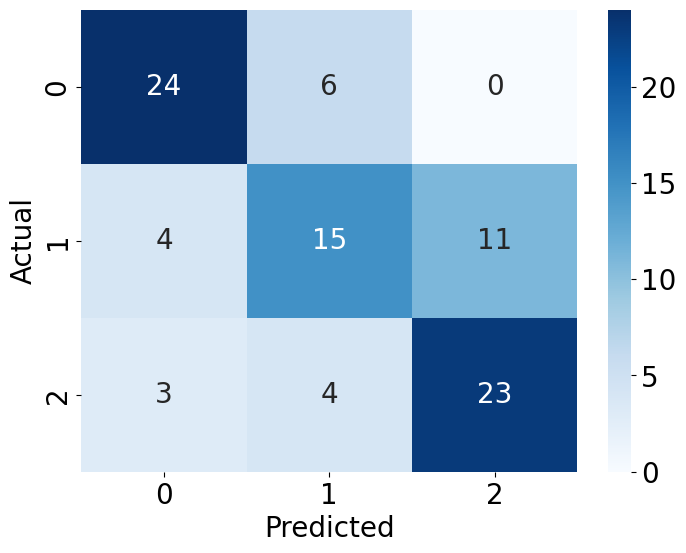

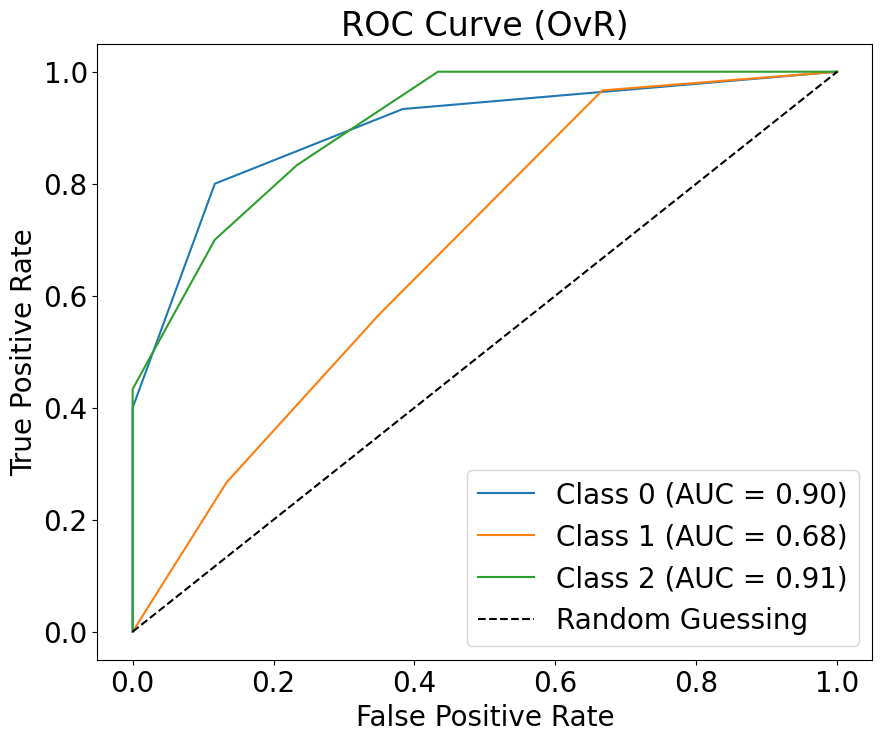

In [23]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# --- Load Data ---
# (Assume your DataFrame is already loaded as 'df')
if "Dopant" in df.columns:
    df = df.drop(columns=["Dopant"])

# Define Features and Target
target_column = "Classification"
feature_names = df.drop(columns=[target_column]).columns.tolist()

X_full = df.drop(columns=['Classification']).to_numpy()
y_full = df['Classification'].to_numpy()

# Split into training+validation and held-out test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.15, random_state=42, stratify=y_full
)

def objective(trial):
    # Optimize the number of neighbors
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    aucs = []
    
    for train_index, val_index in skf.split(X_train_val, y_train_val):
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]
        
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train_fold_scaled, y_train_fold)
        
    #     preds = model.predict(X_val_fold_scaled)
    #     accuracy = accuracy_score(y_val_fold, preds)
    #     accuracies.append(accuracy)
    
    # return np.mean(accuracies)

        auc = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold_scaled), multi_class='ovr')
        aucs.append(auc)
    return np.min(aucs)

# --- Hyperparameter Optimization using Optuna ---
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

best_params = study.best_params
print(f"Best params: {best_params}")

# --- Final Model Training on Full Training Data ---
scaler_final = StandardScaler()
X_train_val_scaled = scaler_final.fit_transform(X_train_val)
X_test_scaled = scaler_final.transform(X_test)

best_model = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"])
best_model.fit(X_train_val_scaled, y_train_val)

# --- Evaluate on Held-Out Test Set ---
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity = recall_score(y_test, y_pred, average='weighted', pos_label=0)
auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"AUC-ROC: {auc_roc}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Classification_Test_KNN.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

# --- Generate ROC Curves for Each Class ---
# Get the probabilities predicted by the model
y_prob = best_model.predict_proba(X_test_scaled)

# Number of classes
num_classes = y_prob.shape[1]

# Initialize the ROC graph
plt.figure(figsize=(10, 8))

# Iterate through each class to compute ROC curve and AUC
for i in range(num_classes):
    # Binarize the target variable for the current class (one-vs-rest approach)
    y_test_binarized = (y_test == i).astype(int)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob[:, i])
    
    # Compute AUC score
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with AUC in legend
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Add graph details
plt.title("ROC Curve (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Save and show the graph
plt.savefig("Multi_class_roc_curve_KNN.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

# XGBoost

[I 2025-06-13 00:39:05,467] A new study created in memory with name: no-name-4d08a9c1-2ca3-458e-8bf5-4a6e2df356ca
[I 2025-06-13 00:39:07,565] Trial 0 finished with value: 0.7237600922722031 and parameters: {'n_estimators': 689, 'max_depth': 11, 'learning_rate': 0.4275312783638925, 'subsample': 0.8982107473680367, 'colsample_bytree': 0.8905171395144287, 'gamma': 2.1580677218896884, 'reg_lambda': 3.819128810026396, 'reg_alpha': 3.1822536792000338, 'min_child_weight': 15}. Best is trial 0 with value: 0.7237600922722031.
[I 2025-06-13 00:39:11,988] Trial 1 finished with value: 0.8143021914648211 and parameters: {'n_estimators': 935, 'max_depth': 11, 'learning_rate': 0.08301814452798685, 'subsample': 0.6134868383394642, 'colsample_bytree': 0.5213771545394386, 'gamma': 0.14769020775427855, 'reg_lambda': 3.5308668642934293, 'reg_alpha': 0.7288384112106805, 'min_child_weight': 3}. Best is trial 1 with value: 0.8143021914648211.
[I 2025-06-13 00:39:13,740] Trial 2 finished with value: 0.8062283

Best params: {'n_estimators': 287, 'max_depth': 8, 'learning_rate': 0.04315635281438485, 'subsample': 0.9571219274661595, 'colsample_bytree': 0.9725575137926274, 'gamma': 0.08625150903541026, 'reg_lambda': 2.4341592128365495, 'reg_alpha': 0.10796992491230252, 'min_child_weight': 1}
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.58      0.60      0.59        30
           2       0.72      0.70      0.71        30

    accuracy                           0.70        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.70      0.70      0.70        90

Confusion Matrix:
[[24  6  0]
 [ 4 18  8]
 [ 2  7 21]]
Precision: 0.7015943641082685
Recall: 0.7
Specificity: 0.7
AUC-ROC: 0.8887037037037038


c:\Users\nurea\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


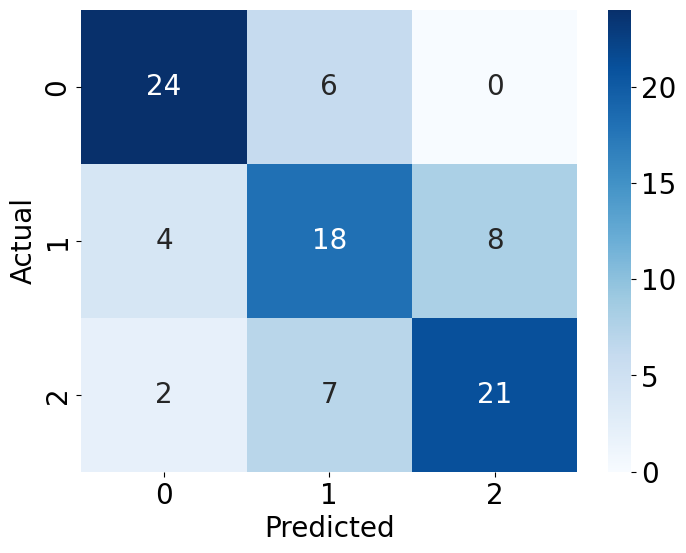

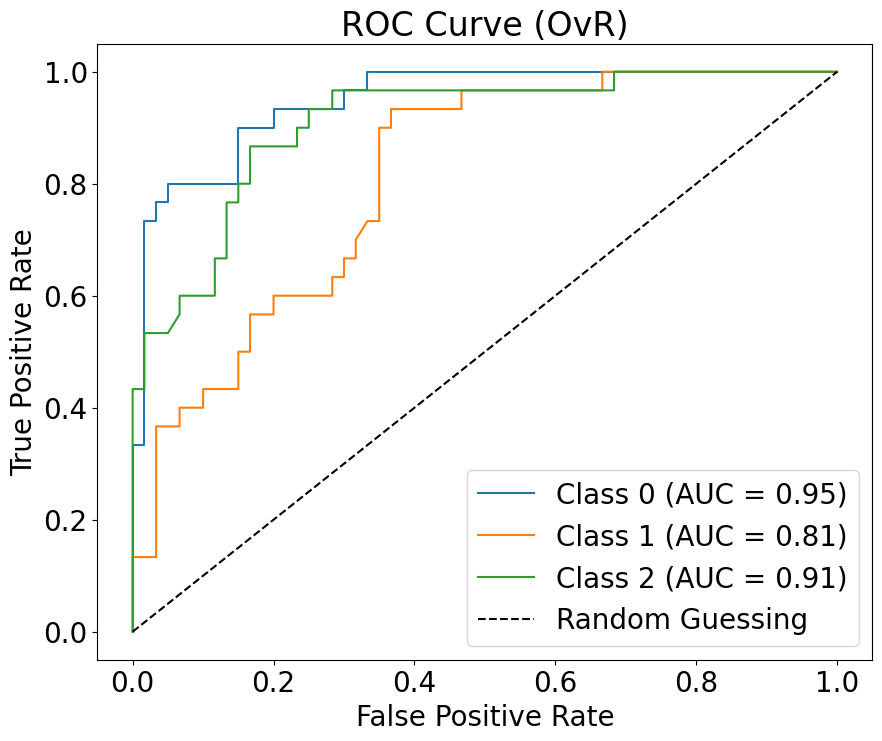

In [24]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
import shap
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# --- Preprocessing and Held-Out Test Split ---

# (Assume your DataFrame is already loaded as 'df')
# Remove the "Dopant" column if it exists
if "Dopant" in df.columns:
    df = df.drop(columns=["Dopant"])

# Define Features and Target
target_column = "Classification"

# Save feature names
feature_names = df.drop(columns=[target_column]).columns.tolist()

X_full = df.drop(columns=['Classification']).to_numpy()
y_full = df['Classification'].to_numpy()

# Split into training+validation and held-out test sets (e.g., 85%/15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.15, random_state=42, stratify=y_full
)

# --- Define the Objective Function with Stratified K-Fold CV ---
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
    }
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    aucs = []
    
    for train_index, val_index in skf.split(X_train_val, y_train_val):
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]
        
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        
        model = XGBClassifier(**params, objective="multi:softmax", num_class=4)
        model.fit(X_train_fold_scaled, y_train_fold)
        
        # preds = model.predict(X_val_fold_scaled)
    #     accuracy = accuracy_score(y_val_fold, preds)
    #     accuracies.append(accuracy)
    
    # return np.mean(accuracies)

        auc = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold_scaled), multi_class='ovr')
        aucs.append(auc)
    return np.min(aucs)

# --- Hyperparameter Optimization using Optuna ---
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

best_params = study.best_params
print(f"Best params: {best_params}")

# --- Final Model Training on Full Training Data (Train+Validation) ---
scaler_final = StandardScaler()
X_train_val_scaled = scaler_final.fit_transform(X_train_val)
X_test_scaled = scaler_final.transform(X_test)

best_model = XGBClassifier(**best_params, objective="multi:softmax", num_class=3)
best_model.fit(X_train_val_scaled, y_train_val)

# --- Evaluate on Held-Out Test Set ---
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity = recall_score(y_test, y_pred, average='weighted', pos_label=0)
auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"AUC-ROC: {auc_roc}")


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Classification_Test_XGBoost.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

# --- Generate ROC Curves for Each Class ---
# Get the probabilities predicted by the model
y_prob = best_model.predict_proba(X_test_scaled)

# Number of classes
num_classes = y_prob.shape[1]

# Initialize the ROC graph
plt.figure(figsize=(10, 8))

# Iterate through each class to compute ROC curve and AUC
for i in range(num_classes):
    # Binarize the target variable for the current class (one-vs-rest approach)
    y_test_binarized = (y_test == i).astype(int)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob[:, i])
    
    # Compute AUC score
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Add graph details
plt.title("ROC Curve (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Save and show the graph
plt.savefig("Multi_class_roc_curve_xgboost.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

## Random Forest

[I 2025-06-13 01:03:14,682] A new study created in memory with name: no-name-afb5f71a-143a-447d-9cb8-0b389402cb2b
[I 2025-06-13 01:03:17,157] Trial 0 finished with value: 0.8437139561707037 and parameters: {'n_estimators': 265, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8437139561707037.
[I 2025-06-13 01:03:19,553] Trial 1 finished with value: 0.7854671280276818 and parameters: {'n_estimators': 185, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8437139561707037.
[I 2025-06-13 01:03:22,633] Trial 2 finished with value: 0.823529411764706 and parameters: {'n_estimators': 236, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8437139561707037.
[I 2025-06-13 01:03:27,062] Trial 3 finished with value: 0.8414071510957325 an

Best params: {'n_estimators': 348, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.58      0.63      0.60        30
           2       0.71      0.83      0.77        30

    accuracy                           0.72        90
   macro avg       0.75      0.72      0.73        90
weighted avg       0.75      0.72      0.73        90

Confusion Matrix:
[[21  9  0]
 [ 1 19 10]
 [ 0  5 25]]
Precision: 0.7481962481962482
Recall: 0.7222222222222222
Specificity: 0.7222222222222222
AUC-ROC: 0.8446296296296296


c:\Users\nurea\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


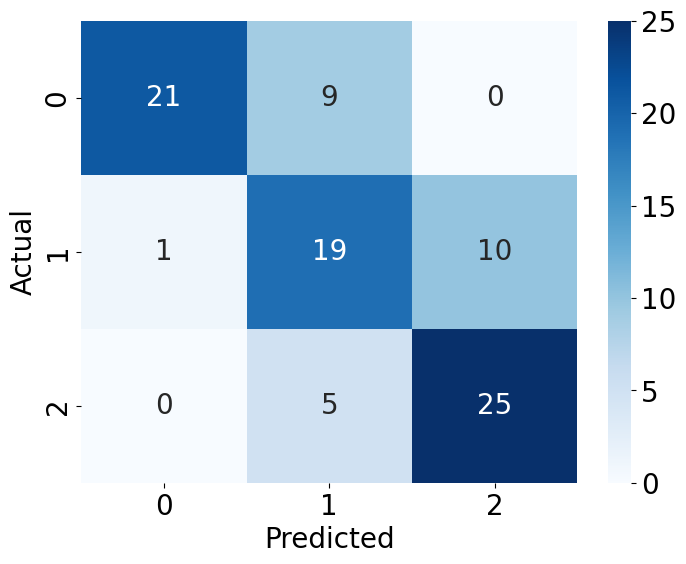

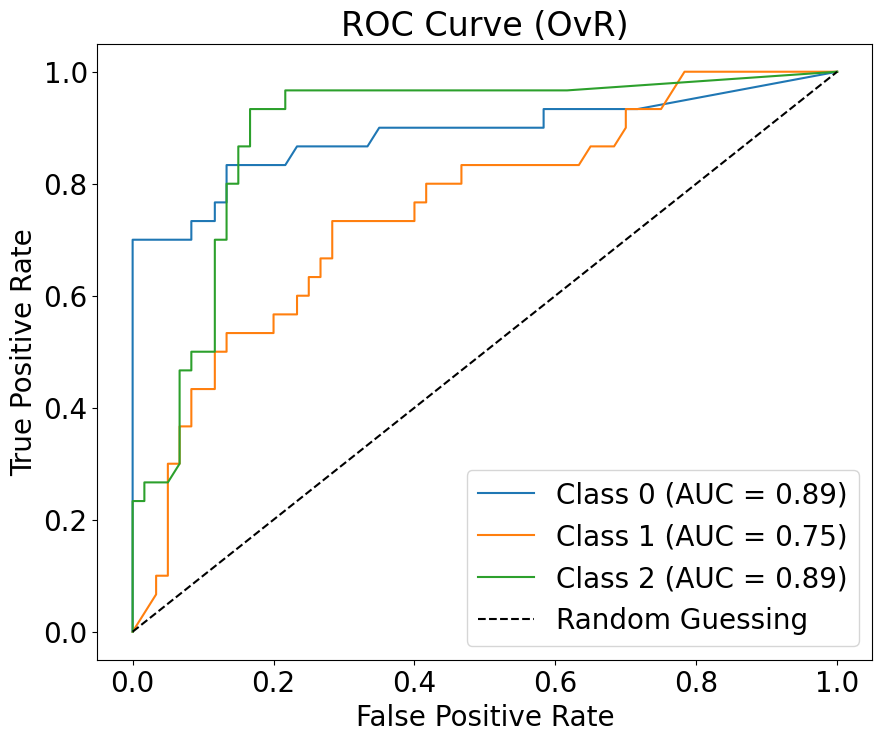

In [25]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# --- Load Data ---
# (Assume your DataFrame is already loaded as 'df')
# Remove the "Dopant" column if it exists
if "Dopant" in df.columns:
    df = df.drop(columns=["Dopant"])

# Define Features and Target
target_column = "Classification"

# Save feature names
feature_names = df.drop(columns=[target_column]).columns.tolist()

X_full = df.drop(columns=['Classification']).to_numpy()
y_full = df['Classification'].to_numpy()

# Split into training+validation and held-out test sets (e.g., 85%/15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.15, random_state=42, stratify=y_full
)

# --- Define the Objective Function with Stratified K-Fold CV ---
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # accuracies = []
    aucs = []

    for train_index, val_index in skf.split(X_train_val, y_train_val):
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)

        model = RandomForestClassifier(**params)
        model.fit(X_train_fold_scaled, y_train_fold)

        # preds = model.predict(X_val_fold_scaled)
        # accuracy = accuracy_score(y_val_fold, preds)
        # accuracies.append(accuracy)
    # return np.mean(accuracies)

        auc = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold_scaled), multi_class='ovr')
        aucs.append(auc)
    return np.min(aucs)

# --- Hyperparameter Optimization using Optuna ---
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

best_params = study.best_params
print(f"Best params: {best_params}")

# --- Final Model Training on Full Training Data (Train+Validation) ---
scaler_final = StandardScaler()
X_train_val_scaled = scaler_final.fit_transform(X_train_val)
X_test_scaled = scaler_final.transform(X_test)

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_val_scaled, y_train_val)

# --- Evaluate on Held-Out Test Set ---
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity = recall_score(y_test, y_pred, average='weighted', pos_label=0)
auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"AUC-ROC: {auc_roc}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Classification_Test_RF.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

# --- Generate ROC Curves for Each Class ---
# Get the probabilities predicted by the model
y_prob = best_model.predict_proba(X_test_scaled)

# Number of classes
num_classes = y_prob.shape[1]

# Initialize the ROC graph
plt.figure(figsize=(10, 8))

# Iterate through each class to compute ROC curve and AUC
for i in range(num_classes):
    # Binarize the target variable for the current class (one-vs-rest approach)
    y_test_binarized = (y_test == i).astype(int)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob[:, i])
    
    # Compute AUC score
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Add graph details
plt.title("ROC Curve (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Save and show the graph
plt.savefig("Multi_class_roc_curve_RF.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()